In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


# Load your dataset
data = pd.read_csv("dataset.csv")

In [23]:
# Select only numerical columns from the dataset
numerical_data = data.select_dtypes(include=['number'])

# Define the target and grouping columns
target_column = 'num_of_obese'
grouping_columns = [col for col in numerical_data.columns if col != target_column]


In [24]:
# Perform ANOVA
anova_results = {}
for col in grouping_columns:
    # Split data into bins for grouping
    numerical_data['group'] = pd.qcut(numerical_data[col], q=4, labels=False, duplicates='drop')
    groups = [group[target_column].values for _, group in numerical_data.groupby('group')]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[col] = {'F-statistic': f_stat, 'P-value': p_value}

# Create a DataFrame to display results
anova_df = pd.DataFrame.from_dict(anova_results, orient='index').sort_values(by='P-value')
print(anova_df)


                     F-statistic       P-value
num_of_health_clubs    25.311109  8.043624e-10
restaurant_count       24.166977  1.538413e-09
num_not_exercise        5.467919  2.674461e-03
unemployment            3.712829  1.789846e-02
num_exercise            2.307837  8.894962e-02
education               1.070442  3.709163e-01
Unnamed: 0              0.439139  7.260811e-01
income                  0.346879  7.915489e-01


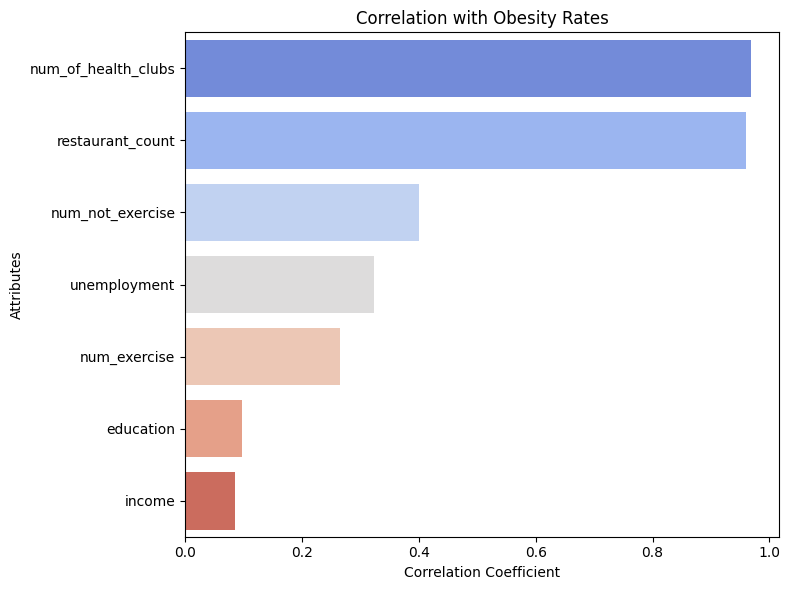

In [25]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Drop unwanted columns
columns_to_exclude = ['num_of_obese', 'group', 'Unnamed: 0']
filtered_data = numerical_data.drop(columns=columns_to_exclude, errors='ignore')

# Calculate correlation with the target column
correlation_matrix = filtered_data.corrwith(numerical_data['num_of_obese']).sort_values(ascending=False)

# Convert to DataFrame for better visualization
correlation_df = correlation_matrix.to_frame(name='Correlation').reset_index()
correlation_df.rename(columns={'index': 'Attribute'}, inplace=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.barplot(y='Attribute', x='Correlation', data=correlation_df, palette='coolwarm')
plt.title("Correlation with Obesity Rates")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Attributes")
plt.tight_layout()
plt.show()


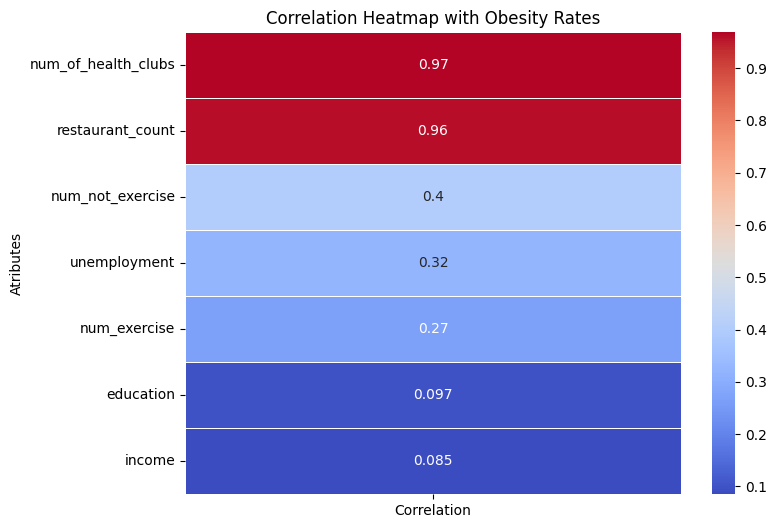

In [34]:


# Calculate correlation with the target column
correlation_matrix_HM = filtered_data.corrwith(numerical_data['num_of_obese']).to_frame(name='Correlation').sort_values(by='Correlation',ascending=False)

#Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_HM, annot=True, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap with Obesity Rates")
plt.ylabel("Atributes")
plt.show()
